# What are the most optimal skills to learn for Data Analysts?

### Methodology
1. Calculate Skills percentage and there corresponding Median Salaries.
2. Determining if Technology are more prevalent.

### Importing Data and Libraries and Basic Data Cleanup

In [1]:
#Importing Essential Modules and Libraries
import ast
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import seaborn as sns


#loading Data

df=load_dataset('lukebarousse/data_jobs')['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Rahul Bhardwaj\anaconda3\envs\plearn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Calculating percentage of Skills

In [5]:
selected_country='India'
no_of_title=3 # for India there are few no of job posting with Salary
selected_title = 'Data Analyst'
df_sel=df[df['job_country']==selected_country].dropna(subset=['salary_year_avg'])
df_da=df_sel[df_sel['job_title_short']== selected_title]
df_skill_pay=df_da.explode('job_skills')
df_skill_pay=df_skill_pay.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_skill_pay['skill_per']=100*df_skill_pay['count']/len(df_da)
df_skill_pay


,count,median,skill_per
job_skills,,,
sql,46,96050.0,48.936170
excel,39,98500.0,41.489362
python,36,96050.0,38.297872
tableau,20,108087.5,21.276596
r,18,79200.0,19.148936
...,...,...,...
postgresql,1,165000.0,1.063830
ms access,1,64600.0,1.063830
mysql,1,165000.0,1.063830


### Plotting Skills on Scatter Plot

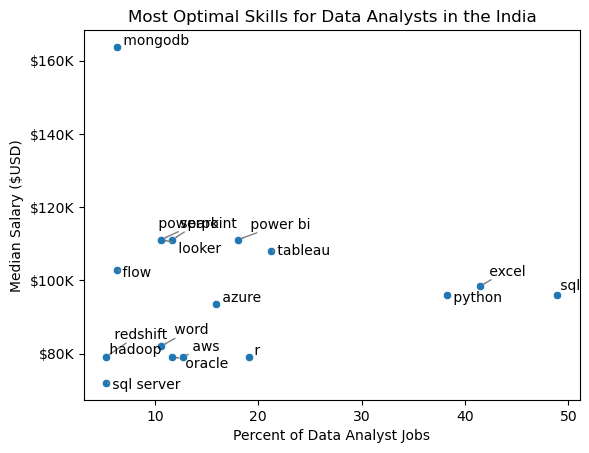

In [13]:
df_plot=df_skill_pay[df_skill_pay['skill_per']>5]

sns.scatterplot(data=df_plot,y='median',x='skill_per')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the India')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot['skill_per'].iloc[i], df_plot['median'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()



### Finding Technology for Skills

In [14]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))



In [15]:
# turn dictionary into dataframe
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,spreadsheet
0,analyst_tools,datarobot
0,analyst_tools,powerbi
0,analyst_tools,sharepoint
0,analyst_tools,looker
...,...,...
9,sync,slack
9,sync,google chat
9,sync,twilio
9,sync,ringcentral


In [23]:
# merge df_DA_skills and df_technology
df_plot = df_plot.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,count,median,skill_per,technology,skills
0,46,96050.00,48.936170,programming,sql
1,39,98500.00,41.489362,analyst_tools,excel
2,36,96050.00,38.297872,programming,python
3,20,108087.50,21.276596,analyst_tools,tableau
4,18,79200.00,19.148936,programming,r
5,17,111175.00,18.085106,analyst_tools,power bi
6,15,93600.00,15.957447,cloud,azure
7,12,79200.00,12.765957,cloud,aws
8,11,79200.00,11.702128,cloud,oracle
9,11,111175.00,11.702128,libraries,spark


### Plot of the Skills with Technology color coded

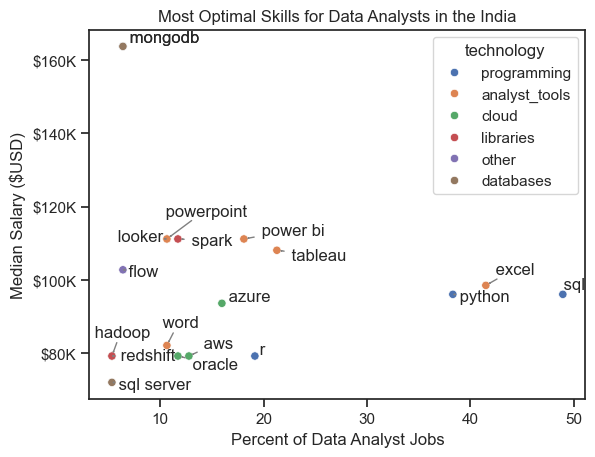

In [27]:
df_plot.set_index('skills',inplace=True)
sns.set_theme(style='ticks')
sns.scatterplot(data=df_plot,y='median',x='skill_per', hue='technology')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the India')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot['skill_per'].iloc[i], df_plot['median'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
from adjustText import adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()
